In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/sonar.csv'

In [ ]:
df = pd.read_csv(filename)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:, 60]

In [ ]:
# 문자열 반환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# 학습 셋과 테스트 셋의 구분
from sklearn.model_selection import train_test_split
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)


In [ ]:
model = Sequential()
model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1464      
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=5)

Epoch 1/200
23/23 [==============================] - 1s 8ms/step - loss: 0.2569 - accuracy: 0.4609 - val_loss: 0.2494 - val_accuracy: 0.6207
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.6261 - val_loss: 0.2457 - val_accuracy: 0.5172
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.6348 - val_loss: 0.2401 - val_accuracy: 0.5517
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.6696 - val_loss: 0.2270 - val_accuracy: 0.6552
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.6783 - val_loss: 0.2219 - val_accuracy: 0.5862
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.6696 - val_loss: 0.2095 - val_accuracy: 0.7241
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.6957 - val_loss: 0.2058 - val_accuracy: 0.6897
Epoch 8/200
2

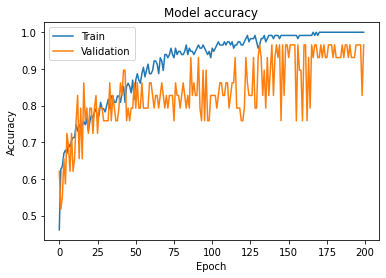

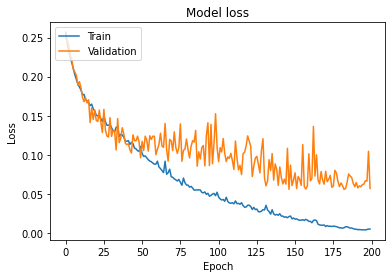

In [ ]:
import matplotlib.pyplot as plt
# 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# 학습한 데이터 save 
save_dir = '/content/drive/My Drive/Colab Notebooks/model_save/'

In [ ]:
model.save(save_dir + 'my_model.h5' )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1464      
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
del model

In [ ]:
model = load_model(save_dir + 'my_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1464      
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1197 - accuracy: 0.8413
